## **KELOMPOK B**
1. Azizah Annurohmah (2006572983)
2. Kesia Gabriele (2006464013)
3. Keziah R. A. Aruan (2006570990)
4. Muhammad Ammar Daffa (2006571066)
5. Rafa Elmira Afiani (2006486153)
6. Ruth Intan Davina (2006483246)
7. Sachi Kirana Hera Singh (2006572926)
8. Vito Waradana (2006482073)



##Problem Statement
* AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan.
* Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta.
* Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan.

* Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

##Pre-Processing

In [ ]:
#IMPORT MODULE
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
from matplotlib.pyplot import figure

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [ ]:
#IMPORT DATA
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/keziaharuan/datminsemangaaaaattt/main/Kasus-AR-MBA-Ganjil-2022.csv
df = pd.read_csv("https://raw.githubusercontent.com/keziaharuan/datminsemangaaaaattt/main/Kasus-AR-MBA-Ganjil-2022.csv", sep=';')
df.head()

mkdir: cannot create directory ‘data’: File exists
--2022-10-21 08:36:44--  https://raw.githubusercontent.com/keziaharuan/datminsemangaaaaattt/main/Kasus-AR-MBA-Ganjil-2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1759 (1.7K) [text/plain]
Saving to: ‘data/Kasus-AR-MBA-Ganjil-2022.csv.2’

Kasus-AR-MBA-Ganjil 100%[===================>]   1.72K  --.-KB/s    in 0s      

2022-10-21 08:36:44 (32.2 MB/s) - ‘data/Kasus-AR-MBA-Ganjil-2022.csv.2’ saved [1759/1759]



,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,01/07/2022 00:00,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaN,NaN,2,Air Minum,Aquos,1
2,NaN,NaN,NaN,11,Mie Instan,Indomi,2
3,NaN,NaN,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,01/07/2022 00:00,Mr. B,2,Air Minum,Aquos,1


In [ ]:
#FILL NA
df['Konsumen'].fillna(method = 'ffill', inplace = True)
df['Tanggal'].fillna(method = 'ffill', inplace=True)
df['ID Transaksi'].fillna(method = 'ffill', inplace=True)
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,01/07/2022 00:00,Mr. A,1,Roti,Sri Roti,2
1,1.0,01/07/2022 00:00,Mr. A,2,Air Minum,Aquos,1
2,1.0,01/07/2022 00:00,Mr. A,11,Mie Instan,Indomi,2
3,1.0,01/07/2022 00:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,01/07/2022 00:00,Mr. B,2,Air Minum,Aquos,1


In [ ]:
#CHECK DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  56 non-null     float64
 1   Tanggal       56 non-null     object 
 2   Konsumen      56 non-null     object 
 3   ID Produk     56 non-null     int64  
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB


In [ ]:
df['Nama Produk'] = df['Nama Produk'].str.strip() # remove unnecessary spaces
df['Merek'] = df['Merek'].str.strip() # remove unnecessary spaces
df.dropna(axis=0, subset=['ID Transaksi'], inplace=True) # delete rows with no invoice no

In [ ]:
#CHANGE TYPE DATA
df['Tanggal']= pd.to_datetime(df['Tanggal'])
df['ID Transaksi']= df['ID Transaksi'].astype('int')
df['Merek']= df['Merek'].astype('category')
df['Nama Produk']= df['Nama Produk'].astype('category')

In [ ]:
#CHECK DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
dtypes: category(2), datetime64[ns](1), int64(3), object(1)
memory usage: 3.5+ KB


## Basket Data



*   Berdasarkan Merek



In [ ]:
#CREATE BASKET DATA
basket = df.groupby(['ID Transaksi','Merek'])['Jumlah'].sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,2,0,0,0,1,0,0,2
2,1,2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,3,0,0,0,1,0,2,0,2,2
5,0,1,0,0,0,0,0,0,0,0,2,0
6,0,0,0,1,2,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,0
8,0,1,0,1,3,0,1,0,0,0,0,0
9,1,2,0,0,2,1,0,1,0,0,0,2


In [ ]:
#ENCODE THE DATA
def encode_units(x):
  if x <= 0:
    return 0
  elif x >=1:
    return 1

basket_encode = basket.applymap(encode_units)
basket_encode

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,0
8,0,1,0,1,1,0,1,0,0,0,0,0
9,1,1,0,0,1,1,0,1,0,0,0,1


In [ ]:
#FILTER DATA YANG HANYA MEMBELI SATU ITEM
basket_sets = basket_encode[(basket_encode > 0).sum(axis=1)>=2]
basket_sets

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,0
8,0,1,0,1,1,0,1,0,0,0,0,0
9,1,1,0,0,1,1,0,1,0,0,0,1


Berdasarkan hasil di atas, kita dapat melihat bahwa ada **16** transaksi yang membeli lebih dari 1 item. Artinya, **88.9%** dari data basket adalah transaksi pembelian lebih dari 1 jenis item.



*   Berdasarkan Kategori Nama Produk



In [ ]:
basket2 = df.groupby(['ID Transaksi','Nama Produk'])['Jumlah'].sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')

In [ ]:
basket2_encode = basket2.applymap(encode_units)
basket2

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,3,0,2,0,0,0
2,1,0,0,1,0,1,2
3,0,0,1,0,1,1,0
4,2,2,0,2,1,0,3
5,2,0,0,0,0,0,1
6,0,2,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,3,0,0,1,1,1
9,1,2,1,2,1,0,2


In [ ]:
#Filter transaksi yang hanya membeli 1 kategori produk
basket2_sets = basket2_encode[(basket2_encode > 0).sum(axis = 1)>=2]
basket2_sets

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1
6,0,1,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,1,0,0,1,1,1
9,1,1,1,1,1,0,1


## Apriori Algorithm



*   Berdasarkan Merek



In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, inplace = True)
frequent_itemsets

,support,itemsets
1,0.4375,(Chiki)
3,0.3750,(Clean)
10,0.3750,(Sprit)
11,0.3750,(Sri Roti)
4,0.3125,(Indomi)
5,0.3125,(Lifboy)
0,0.2500,(Aquos)
7,0.2500,(Malioboro)
16,0.1875,"(Chiki, Clean)"
28,0.1875,"(Indomi, Lifboy)"


Dari hasil di atas, terlihat bahwa 3 item yang paling sering dibeli adalah Chiki, Clean, Sprit.

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
95,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.1250,0.1250,0.1250,1.000000,8.000000,0.109375,inf
90,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.1250,0.1250,0.1250,1.000000,8.000000,0.109375,inf
94,"(Sri Roti, Aquos)","(Chiki, Lifboy)",0.1875,0.1250,0.1250,0.666667,5.333333,0.101562,2.625000
27,(Citata),"(Sprit, Sri Roti)",0.1250,0.1875,0.1250,1.000000,5.333333,0.101562,inf
91,"(Chiki, Lifboy)","(Sri Roti, Aquos)",0.1250,0.1875,0.1250,1.000000,5.333333,0.101562,inf
...,...,...,...,...,...,...,...,...,...
0,(Chiki),(Clean),0.4375,0.3750,0.1875,0.428571,1.142857,0.023438,1.093750
21,(Indomi),(Sri Roti),0.3125,0.3750,0.1250,0.400000,1.066667,0.007812,1.041667
20,(Sri Roti),(Indomi),0.3750,0.3125,0.1250,0.333333,1.066667,0.007812,1.031250
60,(Sri Roti),(Lifboy),0.3750,0.3125,0.1250,0.333333,1.066667,0.007812,1.031250


(Lifboy, Aquos) memiliki asosiasi yang kuat dengan (Chiki, Sri Roti).



*   Berdasarkan kategori produk



In [ ]:
frequent_itemsets2 = apriori(basket2_sets, min_support=0.07, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2.sort_values(by='support', ascending=True, inplace = True)
frequent_itemsets2

,support,itemsets,length
40,0.1250,"(Air Minum, Sabun, Mie Instan, Roti, Snack)",5
25,0.1250,"(Snack, Air Minum, Mie Instan)",3
24,0.1250,"(Air Minum, Sabun, Mie Instan)",3
37,0.1250,"(Snack, Air Minum, Sabun, Mie Instan)",4
36,0.1250,"(Snack, Air Minum, Roti, Mie Instan)",4
35,0.1250,"(Air Minum, Roti, Sabun, Mie Instan)",4
34,0.1250,"(Shampoo, Snack, Sabun)",3
8,0.1250,"(Air Minum, Rokok)",2
29,0.1250,"(Roti, Sabun, Mie Instan)",3
39,0.1250,"(Snack, Roti, Sabun, Mie Instan)",4


Dari hasil di atas, terlihat bahwa 3 jenis produk yang paling sering dibeli adalah Air Minum, Roti, dan Snack.

In [ ]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.sort_values(by='lift', ascending=False, inplace = True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,"(Roti, Sabun)","(Snack, Air Minum, Mie Instan)",0.1875,0.1250,0.1250,0.666667,5.333333,0.101562,2.6250
15,"(Air Minum, Sabun)","(Snack, Roti, Mie Instan)",0.1875,0.1250,0.1250,0.666667,5.333333,0.101562,2.6250
14,"(Snack, Roti, Mie Instan)","(Air Minum, Sabun)",0.1250,0.1875,0.1250,1.000000,5.333333,0.101562,inf
9,"(Snack, Air Minum, Mie Instan)","(Roti, Sabun)",0.1250,0.1875,0.1250,1.000000,5.333333,0.101562,inf
66,"(Air Minum, Sabun)","(Roti, Mie Instan)",0.1875,0.1875,0.1250,0.666667,3.555556,0.089844,2.4375
...,...,...,...,...,...,...,...,...,...
100,(Sabun),(Rokok),0.5000,0.2500,0.1250,0.250000,1.000000,0.000000,1.0000
101,(Rokok),(Sabun),0.2500,0.5000,0.1250,0.500000,1.000000,0.000000,1.0000
102,"(Air Minum, Roti)",(Mie Instan),0.5000,0.3750,0.1875,0.375000,1.000000,0.000000,1.0000
132,"(Air Minum, Roti, Snack)",(Sabun),0.3750,0.5000,0.1875,0.500000,1.000000,0.000000,1.0000


(Snack, Roti, Mie Instan) memiliki asosiasi yang kuat dengan (Air Minum, Sabun).

##Informasi Pembelian Barang Berdasarkan Hari

In [ ]:
df['Hari'] = df['Tanggal'].dt.day_name()

In [ ]:
#MELIHAT BARANG YANG PALING BANYAK DI BELI DI HARI SENIN
mon = df.loc[df['Hari']=='Monday']
mon['Merek'].value_counts()

Lifboy       3
Chiki        2
Clean        2
Sprit        2
Sri Roti     2
Aquos        1
Citata       1
Indomi       1
Luks         1
Malioboro    1
Mi Sedap     1
Prambanan    0
Name: Merek, dtype: int64

In [ ]:
#MELIHAT BARANG YANG PALING BANYAK DI BELI DI HARI SELASA
tue = df.loc[df['Hari']=='Tuesday']
tue['Merek'].value_counts()

Aquos        1
Clean        1
Indomi       1
Lifboy       1
Malioboro    1
Mi Sedap     1
Prambanan    1
Chiki        0
Citata       0
Luks         0
Sprit        0
Sri Roti     0
Name: Merek, dtype: int64

In [ ]:
#MELIHAT BARANG YANG PALING BANYAK DI BELI DI HARI RABU
wed = df.loc[df['Hari']=='Wednesday']
wed['Merek'].value_counts()

Aquos        0
Chiki        0
Citata       0
Clean        0
Indomi       0
Lifboy       0
Luks         0
Malioboro    0
Mi Sedap     0
Prambanan    0
Sprit        0
Sri Roti     0
Name: Merek, dtype: int64

In [ ]:
#MELIHAT BARANG YANG PALING BANYAK DI BELI DI HARI KAMIS
thur = df.loc[df['Hari']=='Thursday']
thur['Merek'].value_counts()

Sprit        3
Chiki        2
Clean        2
Luks         2
Sri Roti     2
Citata       1
Indomi       1
Malioboro    1
Aquos        0
Lifboy       0
Mi Sedap     0
Prambanan    0
Name: Merek, dtype: int64

In [ ]:
#MELIHAT BARANG YANG PALING BANYAK DI BELI DI HARI JUMAT
fri = df.loc[df['Hari']=='Friday']
fri['Merek'].value_counts()

Aquos        2
Chiki        1
Clean        1
Indomi       1
Mi Sedap     1
Prambanan    1
Sri Roti     1
Citata       0
Lifboy       0
Luks         0
Malioboro    0
Sprit        0
Name: Merek, dtype: int64

In [ ]:
#MELIHAT BARANG YANG PALING BANYAK DI BELI DI HARI SABTU
sat = df.loc[df['Hari']=='Saturday']
sat['Merek'].value_counts()

Chiki        2
Aquos        1
Indomi       1
Lifboy       1
Malioboro    1
Prambanan    1
Sprit        1
Sri Roti     1
Citata       0
Clean        0
Luks         0
Mi Sedap     0
Name: Merek, dtype: int64

In [ ]:
#MELIHAT BARANG YANG PALING BANYAK DI BELI DI HARI MINGGU
sun = df.loc[df['Hari']=='Sunday']
sun['Merek'].value_counts()

Malioboro    1
Aquos        0
Chiki        0
Citata       0
Clean        0
Indomi       0
Lifboy       0
Luks         0
Mi Sedap     0
Prambanan    0
Sprit        0
Sri Roti     0
Name: Merek, dtype: int64

Berdasarkan data yang ada, merk barang yang paling sering terjual ada di hari Senin yaitu sebanyak 17. 

Sementara pada hari Rabu, tidak ada transaksi sama sekali.

##KORELASI

In [ ]:
#Berdasarkan Merek
corr_df1=basket.corr().abs()

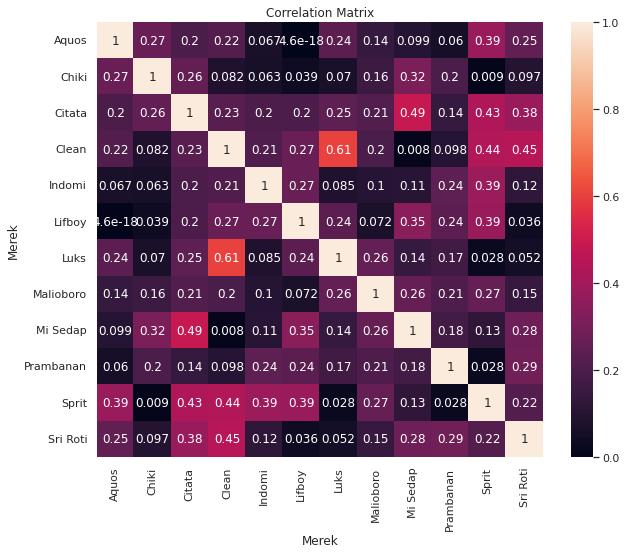

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix')
sns.heatmap(corr_df1,annot=True)
plt.show()

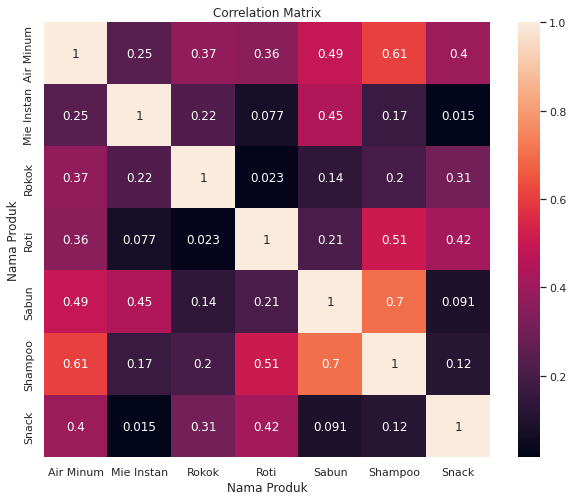

In [ ]:
#Berdasarkan Produk

corr_df2=basket2.corr().abs()
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix')
sns.heatmap(corr_df2,annot=True)
plt.show()

##EDA

In [ ]:
#Parameters for plotting 
merek=['Aquos', 'Chiki','Citata','Clean','Indomi','Lifboy','Luks','Malioboro','Mi Sedap','Prambanan','Sprit','Sri Roti']
nama_prod=['Air Minum', 'Roti', 'Rokok', 'Mie Instan', 'Sabun', 'Shampoo', 'Snack']

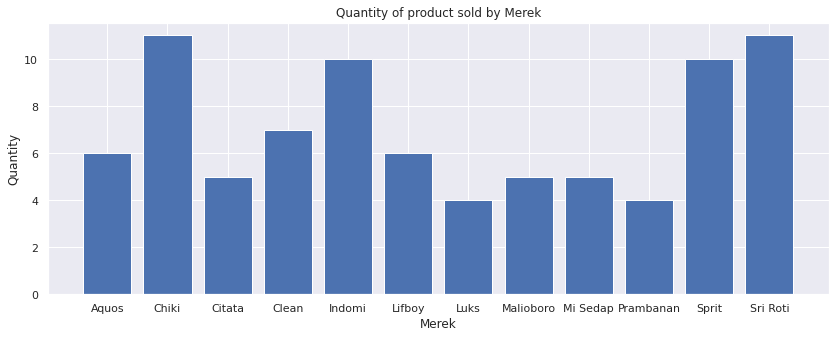

In [ ]:
#Y-axis
quantity_merek=df.groupby('Merek').sum()['Jumlah']

#Plot
plt.title('Quantity of product sold by Merek')
plt.xlabel('Merek')
plt.ylabel('Quantity')
plt.bar(merek,quantity_merek)
fig = plt.gcf()
fig.set_size_inches(14, 5)
fig.savefig('test2png.png', dpi=100)
plt.show()
#print jumlah barang terjual berdasarkan merek

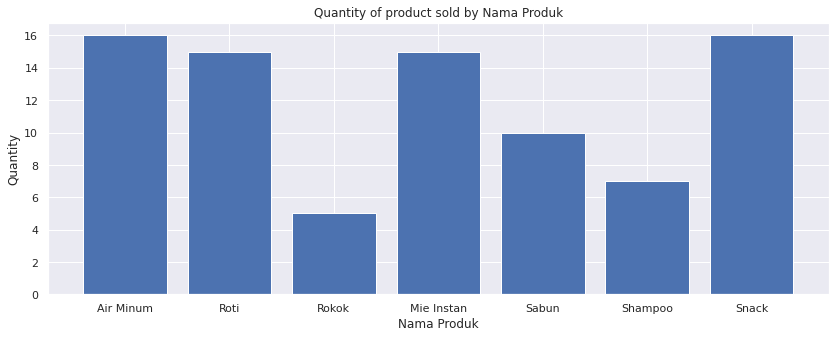

In [ ]:
#Jenis produk yang terjual paling banyak 

#Y-axis
np=df.groupby('Nama Produk').sum()['Jumlah']

#Plot
plt.title('Quantity of product sold by Nama Produk')
plt.xlabel('Nama Produk')
plt.ylabel('Quantity')
plt.bar(nama_prod,np)
fig = plt.gcf()
fig.set_size_inches(14,5)
fig.savefig('test2png.png', dpi=100)
plt.show()
#print jumlah barang terjual berdasarkan kategori

In [ ]:
df.groupby(['Konsumen', 'Tanggal'])[['Jumlah']].sum()

Jumlah
Konsumen Tanggal           
Mr. A    2022-01-07       6
         2022-03-07       3
Mr. B    2022-01-07       5
         2022-02-07      10
         2022-02-10       4
         2022-04-07       6
Mr. C    2022-02-07       3
Mr. D    2022-03-07       4
Mr. F    2022-08-07       1
Mr. G    2022-06-07       6
Mr. J    2022-02-08       2
Mr. P    2022-06-07       3
Mr. T    2022-05-07       5
Mr. X    2022-05-07       9
         2022-05-09       6
         2022-07-07       4
Mr. Z    2022-04-07       2
Mr.Y     2022-07-07       5

Terlihat secara sekilas, konsumen yang paling sering melakukan pembelian adalah Mr. B (4 kali) dilanjutkan oleh Mr. X (3 kali).

## Executive Summary

**Rekomendasi untuk Data Engineer**
1. Kualitas data sudah cukup baik, sebagian besar data memiliki input yang lengkap dan tidak ada baris yang tidak memiliki input sama sekali.
2. Perusahaan AlfaIndo segera merekrut seorang Data Engineer agar data bisa dapat berupa csv dan pengelolaannya lebih efisien.
3. Mungkin bisa ditambahkan variabel lain seperti jenis kelamin.
4. Data yang tersedia cukup sedikit sehingga perlu dikumpulkan lebih banyak data agar *insight* yang didapat lebih informatif.

**Rekomendasi untuk Divisi Marketing**



**1. Penempatan Barang**

Mie Instan, Roti, maupun Snack sering dibeli bersamaan. Sehingga, produk tersebut dapat diletakkan di kasir dan setiap kali pelanggan membeli, kasir dapat menawarkan dan merekomendasikan mereka untuk membeli barang lainnya. Misal pembeli hanya membeli Roti, maka kasir dapat menawarkan mereka untuk membeli Mie Instan/Snack sebelum melanjutkan transaksi.

Disarankan untuk produk Air Minum dijauhkan dari produk jenis makanan karena orang yang membeli produk makanan cenderung memiliki ketergantungan untuk membeli produk air minum juga. Di antara produk Makanan dan produk Air Minum, dapat diselipkan produk-produk yang kurang banyak peminat seperti produk Rokok dan produk kebersihan tubuh seperti Shampoo, dan lainnya.

**2. Produk Bundling**

Jenis produk Sabun dan Air Minum sering dibeli bersamaan dengan produk makanan seperti Mie Instan, Roti, maupun Snack. Berhubung AlfaIndo berada di Kampus UI Depok dimana terdapat banyak mahasiswa yang tinggal di kos, AlfaIndo bisa membuat promo bundling "Paket Anak Kos" dengan 3 pilihan: (1) Sabun, Air Minum, Mie Instan; (2) Sabun, Air Minum, Roti; (3) Sabun, Air Minum, Snack. Dengan menempatkannya sebagai satu paket produk dengan harga yang lebih rendah dibandingkan dengan setiap harga yang digabungkan, hal ini akan menarik lebih banyak pelanggan dan menghasilkan lebih banyak pendapatan.

Rekomendasi Bundling dengan Mereknya:

(1): Lifboy, Aquos, Mi Sedap

(2): Lifboy, Aquos, Prambanan

(3): Lifboy, Aquos, Citata

Pemilihan didasarkan pada association rules dimana Lifboy dan Aquos merupakan pasangan yang sering dibeli lalu di-bundling dengan produk makanan yang jarang dibeli agar promo terlihat menarik.

**3. Diskon**

Berdasarkan data yang ada, transaksi paling sedikit berada di hari Rabu. Diketahui juga banyak peminat pembeli merk Chiki. Dengan asumsi pola transaksi yang berulang setiap minggunya, AlfaIndo disarankan untuk memberikan promo diskon 10% untuk Chiki khusus pada hari Rabu. Kami percaya hal ini dapat meningkatkan jumlah pengunjung toko pada hari tersebut.

**4. Cross-Selling**

Berdasarkan visualisasi data, terlihat bahwa produk yang paling sering dijual ialah Chiki dan Sari Roti. Sementara produk yang paling jarang terjual ialah Luks dan Prambanan. Sehingga dapat dilakukan promo setiap pembelian 2 Buah Chiki/Sari Roti pembeli mendapatkan gratis 1 Luks/Prambanan agar produk Luks/Prambanan dapat lebih dikenal oleh pembeli dan meningkatkan penjualan produk tersebut.

**5. Stok Penyimpanan Produk**

Berdasarkan visualisasi data, produk terbanyak dijual adalah Air Minum dan Snack, sementara produk paling sedikit adalah Rokok. Disarankan untuk menyuplai lebih banyak stok Air Minum dan Snack untuk dijual dan mengurangi supply Rokok.

**6. Kartu Member**

Berdasarkan groupby data, terdapat pelanggan yang cukup sering melakukan pembelian di AlfaIndo. AlfaIndo mungkin bisa menawarkan pelanggan untuk membuat kartu member dan memberikan promo khusus untuk member. Hal ini akan menarik pelanggan-pelanggan setia seperti Mr. B atau Mr.X  tetap terus berbelanja dan lebih memilih untuk belanja di AlfaIndo dibandingkan kompetitior lainnya.

**7. Advertisement**

Disarankan untuk melakukan advertisement pada hari yang ramai pembeli seperti hari Senin, dan advertisement dapat berisikan mengenai promo khusus hanya pada hari yang sepi pembeli seperti hari Rabu atau hari Minggu.